In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load "digits" datasets from SKlearn and print the dimension of the dataset.
from sklearn import datasets

digits = datasets.load_digits()

digits_train = pd.DataFrame(data=digits.data, columns=digits.feature_names)
digits_test = pd.DataFrame(data=digits.target)

In [3]:
digits_train.shape

(1797, 64)

In [4]:
#Apply PCA on the dataset and select first three components.
from sklearn.preprocessing import StandardScaler

digits_norm = digits_train.iloc[:,0:64].values
digits_norm = StandardScaler().fit_transform(digits_norm)

In [5]:
from sklearn.decomposition import PCA
Xnorm = PCA(n_components=3).fit_transform(digits_norm)

In [6]:
#Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s.
Xnorm = pd.DataFrame(data=Xnorm)
Xnorm.shape

(1797, 3)

In [7]:
import mpl_toolkits.mplot3d 
import matplotlib.pyplot as plt

In [8]:
plt.figure(2, figsize=(8, 6))
plt.clf()

<Figure size 800x600 with 0 Axes>

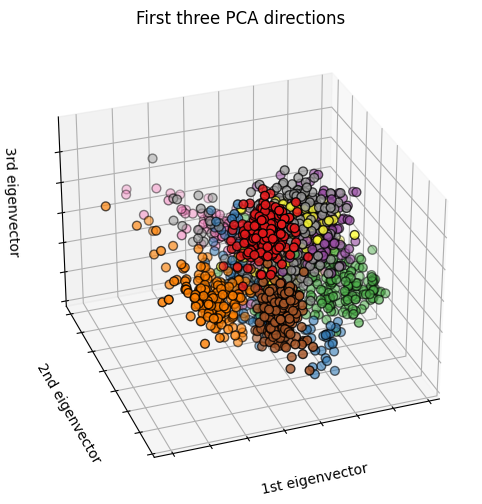

In [9]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    Xnorm.iloc[:, 0],
    Xnorm.iloc[:, 1],
    Xnorm.iloc[:, 2],
    c=digits_test,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [10]:
#Select appropriate data splitting approach and performance metrics.  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnorm, digits.target, test_size=.2, random_state=0)

In [11]:
#Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. 
from sklearn import svm
svc_model = svm.SVC(kernel='rbf', gamma=1e2)
svc_model.fit(X_train, y_train)

SVC(gamma=100.0)

In [12]:
#Report the performances and the used model hyper-parameters.
from sklearn import metrics
print("Data has a total of {} support vectors".format(svc_model.support_vectors_.shape[0]))
print("Training accuracy: {}".format(metrics.accuracy_score(y_train, svc_model.predict(X_train))))
print("Testing accuracy : {}".format(metrics.accuracy_score(y_test, svc_model.predict(X_test))))

Data has a total of 1437 support vectors
Training accuracy: 1.0
Testing accuracy : 0.1361111111111111
